In [10]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
url = 'https://www.kaggle.com/jinxbe/wnba-player-stats-2017/downloads/wnba-player-stats-2017.zip/1'
# wnba = pd.read_csv(url)
# wnba.head()

In [11]:
import zipfile
with zipfile.ZipFile(url) as z:
   with z.open(url) as f:
      train = pd.read_csv(f, header=0, delimiter=",")
      print(train.head()) 

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.kaggle.com/jinxbe/wnba-player-stats-2017/downloads/wnba-player-stats-2017.zip/1'

In [3]:
wnba = pd.read_csv('src/wnba-player-stats-2017.zip')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [8]:
wnba.head()
wnba.tail()
wnba.shape

parameter = wnba['Games Played'].max()

sample = wnba.sample(n=30, random_state=1)

statistic = sample['Games Played'].max()
sampling_error = parameter - statistic

print(parameter, statistic, sampling_error)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


(143, 32)

32 30 2


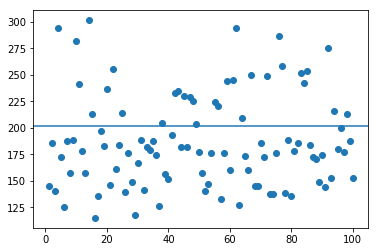

In [11]:
sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()

Which position gets the most points?

In [13]:
wnba['Pts_per_game'] = wnba['PTS']/wnba['Games Played']

# Create dictionary of data frames, each one called by the key name:
group_dict = {key: wnba.loc[value] for key, value in wnba.groupby("Pos").groups.items()}
# Export resuls of operations to new dictionary:
res_dict = {key: group_dict[key]['Pts_per_game'].sample(n=10, random_state = 0).mean() for (key, value) in group_dict.items()}

position_most_points = max(res_dict, key=res_dict.get)
print(position_most_points)

C


,Games Played,Played Range
0,8,12 or less
1,30,23 or more
2,26,23 or more
3,31,23 or more
4,24,23 or more
5,14,22 or less
6,16,22 or less
7,26,23 or more
8,30,23 or more
9,7,12 or less


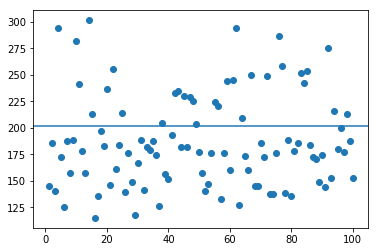

In [15]:
# Set bins based on values
wnba['Played Range'] = pd.cut(wnba['Games Played'], [0,12,22, wnba['Games Played'].max()], \
        include_lowest=False, right=True, labels=['12 or less', '22 or less', '23 or more'])
                                                                                                 
wnba[['Games Played', 'Played Range']].head(20)                                                                                              

sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()